In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm
from scipy import stats

In [2]:
#Load the data

train_housing=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test_housing=pd.read_csv("house-prices-advanced-regression-techniques/test.csv")


In [3]:
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

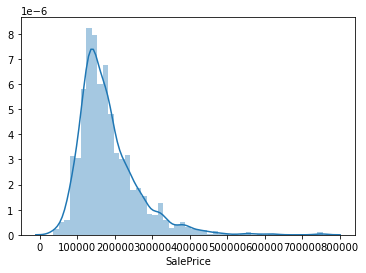

In [4]:
#Plot the value we are predicting

sns.distplot(train_housing['SalePrice']);

In [5]:
#Looking at predictive features
corr_matrix = train_housing.corr()

corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f978e117518>,
      dtype=object)

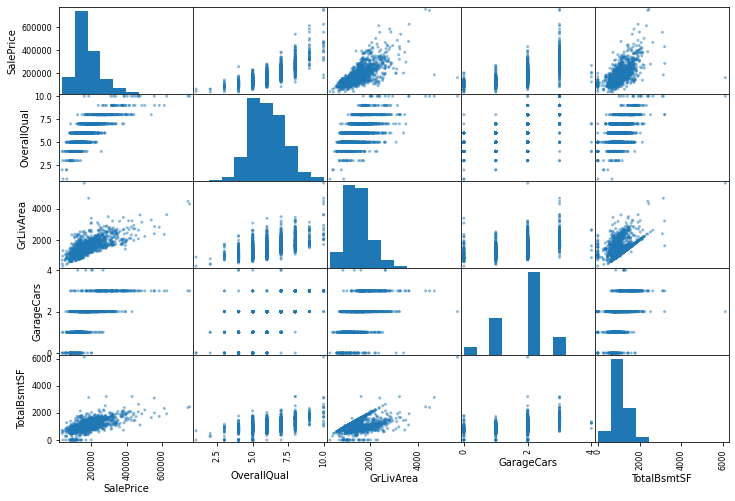

In [6]:
#plotting features with respect to Sale Price
attributes = ["SalePrice", "OverallQual", "GrLivArea",
"GarageCars","TotalBsmtSF"]

scatter_matrix(train_housing[attributes], figsize=(12, 8))



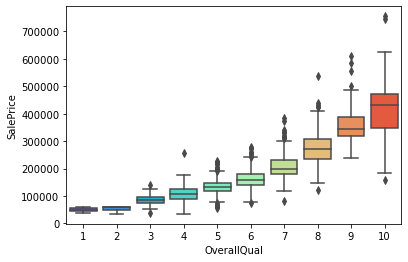

In [7]:
#relationship with categorical values


sns.boxplot(x='OverallQual',y='SalePrice',data=train_housing,palette='rainbow')


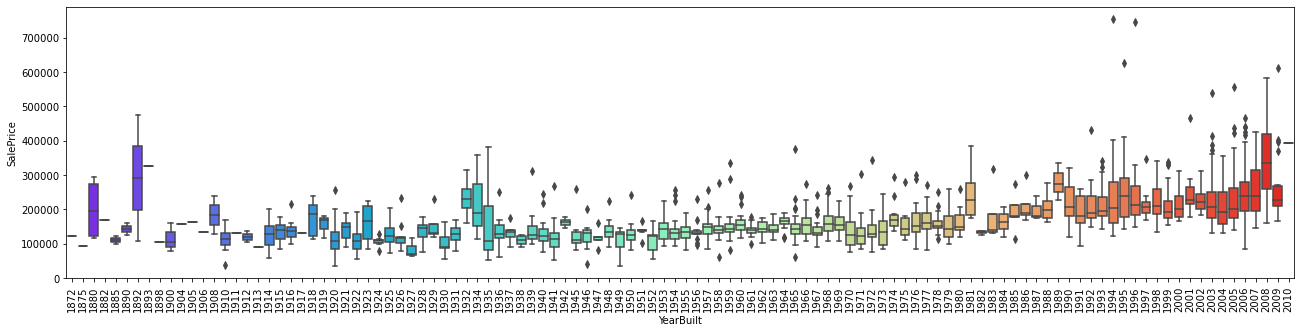

In [8]:
plt.figure(figsize=(22,5))
fig =sns.boxplot(x='YearBuilt',y='SalePrice',data=train_housing,palette='rainbow')
plt.xticks(rotation=90);

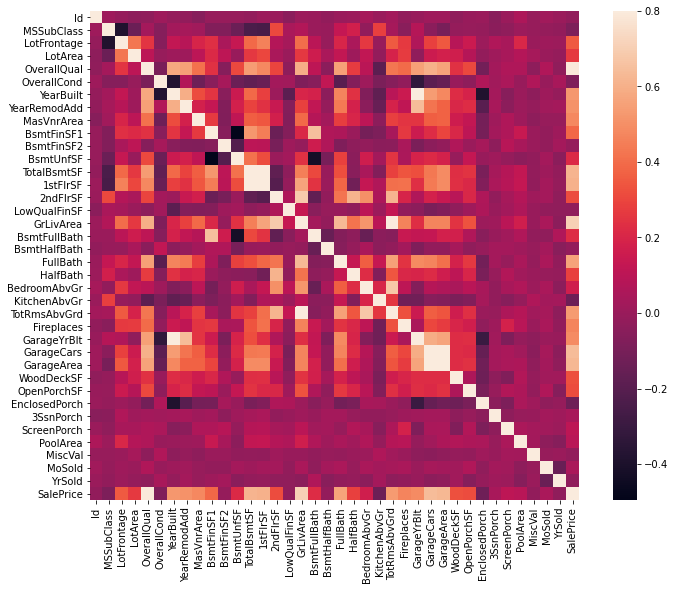

In [9]:
corrmat = train_housing.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


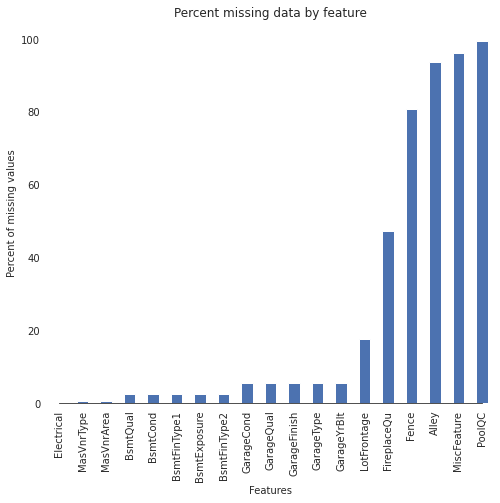

In [10]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train_housing.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)


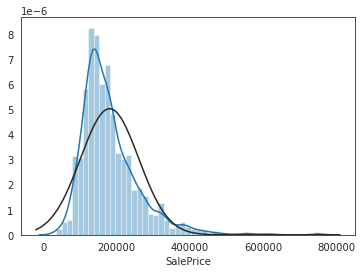

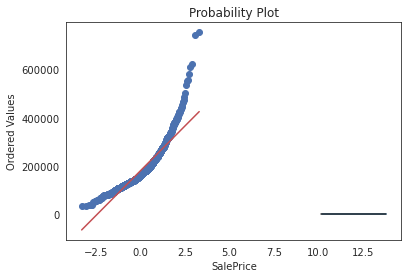

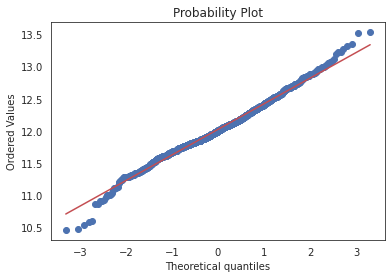

In [11]:
#histogram and normal probability plot
sns.distplot(train_housing['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_housing['SalePrice'], plot=plt)
                     
#applying log transformation
train_housing['SalePrice'] = np.log(train_housing['SalePrice'])

#transformed histogram and normal probability plot
sns.distplot(train_housing['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_housing['SalePrice'], plot=plt)



In [12]:
#creating a new feature
train_housing["area_per_quality"] = train_housing["GrLivArea"]*train_housing["OverallQual"]

In [13]:
corr_matrix = train_housing.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.817184
area_per_quality    0.800062
GrLivArea           0.700927
GarageCars          0.680625
GarageArea          0.650888
TotalBsmtSF         0.612134
1stFlrSF            0.596981
FullBath            0.594771
YearBuilt           0.586570
YearRemodAdd        0.565608
GarageYrBlt         0.541073
TotRmsAbvGrd        0.534422
Fireplaces          0.489449
MasVnrArea          0.430809
BsmtFinSF1          0.372023
LotFrontage         0.355878
WoodDeckSF          0.334135
OpenPorchSF         0.321053
2ndFlrSF            0.319300
HalfBath            0.313982
LotArea             0.257320
BsmtFullBath        0.236224
BsmtUnfSF           0.221985
BedroomAbvGr        0.209044
ScreenPorch         0.121208
PoolArea            0.069798
MoSold              0.057329
3SsnPorch           0.054900
BsmtFinSF2          0.004832
BsmtHalfBath       -0.005149
Id                 -0.017942
MiscVal            -0.020021
OverallCond        -0.036868
YrSold        

In [14]:
all_features = train_housing

all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
all_features['YrSold'] = all_features['YrSold'].astype(str)
all_features['MoSold'] = all_features['MoSold'].astype(str)


#Data Cleaning

def handle_missing(train_stats,features):
    # the data description states that NA refers to typical ('Typ') values
    features['Functional'] = features['Functional'].fillna('Typ')
    # Replace the missing values in each of the columns below with their mode
    features['Electrical'] = features['Electrical'].fillna("SBrkr")
    features['KitchenQual'] = features['KitchenQual'].fillna("TA")
    features['Exterior1st'] = features['Exterior1st'].fillna(train_stats['Exterior1st'].mode()[0])
    features['Exterior2nd'] = features['Exterior2nd'].fillna(train_stats['Exterior2nd'].mode()[0])
    features['SaleType'] = features['SaleType'].fillna(train_stats['SaleType'].mode()[0])
    features['MSZoning'] = train_stats.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    
    features["PoolQC"] = features["PoolQC"].fillna("None")
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        features[col] = features[col].fillna(0)
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        features[col] = features[col].fillna('None')
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        features[col] = features[col].fillna('None')
        
    features['LotFrontage'] = train_stats.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

    
    #replace their missing values with None
    objects = []
    for i in features.columns:
        if features[i].dtype == object:
            objects.append(i)
    features.update(features[objects].fillna('None'))
        
    # replace with 0s
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for i in features.columns:
        if features[i].dtype in numeric_dtypes:
            numeric.append(i)
    features.update(features[numeric].fillna(0))    
    return features


        

In [15]:
#Checking that we filled all missing values
handle_missing(all_features,all_features)
all_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1460 non-null   int64  
 1   MSSubClass        1460 non-null   object 
 2   MSZoning          1460 non-null   object 
 3   LotFrontage       1460 non-null   float64
 4   LotArea           1460 non-null   int64  
 5   Street            1460 non-null   object 
 6   Alley             1460 non-null   object 
 7   LotShape          1460 non-null   object 
 8   LandContour       1460 non-null   object 
 9   Utilities         1460 non-null   object 
 10  LotConfig         1460 non-null   object 
 11  LandSlope         1460 non-null   object 
 12  Neighborhood      1460 non-null   object 
 13  Condition1        1460 non-null   object 
 14  Condition2        1460 non-null   object 
 15  BldgType          1460 non-null   object 
 16  HouseStyle        1460 non-null   object 


In [16]:
housing = all_features.drop("SalePrice", axis=1)
housing_labels = all_features["SalePrice"].copy()

#counting all categorical features
num_cols = housing.columns[housing.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
num_cols=num_cols.drop(['Id'])
#one hot encoding
hot_all_features = pd.get_dummies(housing)

In [17]:
hot_all_features.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
#scaling numerical features

scaler = StandardScaler()

hot_all_features[num_cols] = scaler.fit_transform(hot_all_features[num_cols])


hot_all_features.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.231877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,0,0,0,1,0,0,0,0,1,0
1,2,0.437043,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,3,-0.098093,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,4,-0.454850,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,0,0,0,1,1,0,0,0,0,0
4,5,0.615421,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0,0,0,1,0,0,0,0,1,0


In [19]:
# preprocessing test set

test_housing["area_per_quality"] = test_housing["GrLivArea"]*test_housing["OverallQual"]
test_all_features = test_housing

test_all_features['MSSubClass'] = test_all_features['MSSubClass'].apply(str)
test_all_features['YrSold'] = test_all_features['YrSold'].astype(str)
test_all_features['MoSold'] = test_all_features['MoSold'].astype(str)
handle_missing(all_features,test_all_features)


#one hot encoding
test_hot_all_features = pd.get_dummies(test_housing)

test_hot_all_features[num_cols] = scaler.transform(test_hot_all_features[num_cols])


In [20]:
test_hot_all_features.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,-0.231877,0.110763,-0.795151,0.381743,-0.340077,-1.156380,-0.570750,0.053428,0.604293,...,0,0,0,1,0,0,0,0,1,0
1,1462,0.437043,0.375850,-0.071836,0.381743,-0.439440,-1.301740,0.027027,1.051363,-0.288653,...,0,0,0,1,0,0,0,0,1,0
2,1463,-0.098093,0.332053,-0.795151,-0.517200,0.852269,0.636400,-0.570750,0.761852,-0.288653,...,0,0,0,1,0,0,0,0,1,0
3,1464,-0.454850,-0.054002,-0.071836,0.381743,0.885390,0.636400,-0.460051,0.347326,-0.288653,...,0,0,0,1,0,0,0,0,1,0
4,1465,0.615421,-0.552407,1.374795,-0.517200,0.686666,0.345679,-0.570750,-0.396190,-0.288653,...,0,0,0,1,0,0,0,0,1,0


In [21]:
hot_all_features['SalePrice']=housing_labels
hot_all_features.head()


housing = hot_all_features.drop("SalePrice", axis=1)
housing_labels = hot_all_features["SalePrice"].copy()



In [22]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [23]:
#training decision tree regressor
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.20861507 0.19008029 0.23903375 0.2277755  0.20936927 0.16929334
 0.17469498 0.16326897 0.18036307 0.19794422]
Mean: 0.19604384670583616
Standard deviation: 0.02391913580318775


In [24]:
#training linear regression
lin_reg = LinearRegression()
lin_scores = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.20759598 0.17779785 0.21293505 0.22962651 0.21114176 0.16873274
 0.18848117 0.17369211 0.18406474 0.19608741]
Mean: 0.19501553190431847
Standard deviation: 0.0188229654440847


In [25]:
# training random forest
forest_reg = RandomForestRegressor()
forest_scores = cross_val_score(forest_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.13758366 0.11902916 0.13697067 0.16901706 0.15937007 0.1218369
 0.13385199 0.12056598 0.14207927 0.13904433]
Mean: 0.13793490937539316
Standard deviation: 0.015427082599145223
